<a href="https://colab.research.google.com/github/dustiny5/DS-Unit-4-Sprint-1-NLP/blob/master/LS_DS_411_Text_Data_Lecture.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img align="left" src="https://lever-client-logos.s3.amazonaws.com/864372b1-534c-480e-acd5-9711f850815c-1524247202159.png" width=200>
<br></br>
<br></br>

# Natural Language Processing (NLP) 

## *Data Science Unit 4 Sprint 1 Lesson 1*

"Natural" meaning - not computer languages but spoken/written human languages. The hard thing about NLP is that human languages are far less structured or consistent than computer languages. This is perhaps the largest source of difficulty when trying to get computers to "understand" human languages. How do you get a machine to understand sarcasm, and irony, and synonyms, connotation, denotation, nuance, and tone of voice --all without it having lived a lifetime of experience for context? If you think about it, our human brains have been exposed to quite a lot of training data to help us interpret languages, and even then we misunderstand each other pretty frequently. 

## Learning Objectives
* <a href="#p1">Part 1</a>: Tokenizing Text
* <a href="#p2">Part 2</a>: Removing Stop Words
* <a href="#p3">Part 3</a>: Stemming & Lemmatization

In [0]:
pip install squarify

In [0]:
pip install spacy

In [0]:
pip install nltk

In [10]:
!wget https://github.com/dustiny5/DS-Unit-4-Sprint-1-NLP/blob/master/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip?raw=1

--2019-07-08 21:22:27--  https://github.com/dustiny5/DS-Unit-4-Sprint-1-NLP/blob/master/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip?raw=1
Resolving github.com (github.com)... 192.30.255.112
Connecting to github.com (github.com)|192.30.255.112|:443... connected.
HTTP request sent, awaiting response... 302 Found
Location: https://github.com/dustiny5/DS-Unit-4-Sprint-1-NLP/raw/master/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip [following]
--2019-07-08 21:22:27--  https://github.com/dustiny5/DS-Unit-4-Sprint-1-NLP/raw/master/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip
Reusing existing connection to github.com:443.
HTTP request sent, awaiting response... 302 Found
Location: https://raw.githubusercontent.com/dustiny5/DS-Unit-4-Sprint-1-NLP/master/module1-text-data/data/Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip [following]
--201

In [11]:
!unzip Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip?raw=1

Archive:  Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv.zip?raw=1
replace Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  
replace __MACOSX/._Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv? [y]es, [n]o, [A]ll, [N]one, [r]ename: y
  inflating: __MACOSX/._Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv  


In [0]:
"""
Import Statements
"""

# Base
from collections import Counter
import re

import pandas as pd

# Plotting
import squarify
import matplotlib.pyplot as plt
import seaborn as sns

# NLP Libraries
import spacy
from spacy.tokenizer import Tokenizer
from nltk.stem import PorterStemmer

nlp = spacy.load("en_core_web_sm")

## Tokenizing Text
<a id="p1"></a>

> **token**: an instance of a sequence of characters in some particular document that are grouped together as a useful semantic unit for processing

> [_*Introduction to Information Retrival*_](https://nlp.stanford.edu/IR-book/)


- Build out Amazon case study
- Data found on [Kaggle](https://www.kaggle.com/datafiniti/consumer-reviews-of-amazon-products/)

### Tokenizing with Pure Python

In [0]:
df = pd.read_csv('Datafiniti_Amazon_Consumer_Reviews_of_Amazon_Products_May19.csv')

In [13]:
list(df)

['id',
 'dateAdded',
 'dateUpdated',
 'name',
 'asins',
 'brand',
 'categories',
 'primaryCategories',
 'imageURLs',
 'keys',
 'manufacturer',
 'manufacturerNumber',
 'reviews.date',
 'reviews.dateSeen',
 'reviews.didPurchase',
 'reviews.doRecommend',
 'reviews.id',
 'reviews.numHelpful',
 'reviews.rating',
 'reviews.sourceURLs',
 'reviews.text',
 'reviews.title',
 'reviews.username',
 'sourceURLs']

In [14]:
# How can we count the raw text?
df['reviews.text'].value_counts(normalize=True)[:50]

good                0.002118
great               0.001729
Good                0.001482
Great               0.001341
ok                  0.001165
Great price         0.001059
great price         0.000988
Excellent           0.000988
Great value         0.000953
good price          0.000812
great value         0.000777
Great price!        0.000635
good value          0.000600
good deal           0.000565
Great value.        0.000565
Great product       0.000529
Great deal          0.000529
OK                  0.000529
As expected         0.000529
Good deal           0.000529
Good batteries      0.000494
Good value          0.000494
So far so good      0.000459
Great batteries.    0.000459
great deal          0.000459
Great value!        0.000459
Good price          0.000459
Good buy            0.000424
Work great          0.000424
Great deal!         0.000388
excellent           0.000388
Great buy           0.000388
Great!              0.000388
As described        0.000388
as expected   

#### The attributes of atrributes of good tokens

* Should be stored in an iterable datastructure
  - Allows analysis of the "semantic unit"
* Should be all the same case
  - Reduces the complexity of our data
* Should be free of non-alphanumeric characters (ie punctuation, whitespace)
  - Removes information that is probably not relevant to the analysis

In [0]:
sample = "Friends, Romans, countrymen, lend me your ears;"

##### Iterable Tokens

A string object in Python is already iterable. However, the item you iterate over is a character not a token:

```
from time import sleep
for num, character in enumerate(sample):
    sleep(.5)
    print(f"Char {num} - {character}", end="\r")
```

If we instead care about the words in our sample (our semantic unit), we can use the string method `.split()` to seperate the whitespace and create iterable units. :)

In [0]:
# Splits the string by its white space and puts it in a list
sample.split()

##### Case Normalization
A common data cleaning data cleaning task with token is to standardize or normalize the case. Normalizing case reduces the chance that you have duplicate records for things which have practically the same semantic meaning. You can use either the `.lower()` or `.upper()` string methods to normalize case.

Consider the following example: 

In [16]:
# Notice anything odd here?
# Amazonbasics is the same
df['brand'].value_counts()

Amazon          16153
Amazonbasics    12169
AmazonBasics       10
Name: brand, dtype: int64

In [18]:
# Much cleaner
df['brand'].str.lower().value_counts()

amazon          16153
amazonbasics    12179
Name: brand, dtype: int64

##### Keep Only Alphanumeric Characters
Yes, we only want letters and numbers. Everything else is probably noise: punctionation, whitespace, and other notation. This one is little bit more complicatd than our previous example. Here we will have to import the base package `re` (regular expressions). 

The only regex expression pattern you need for this is `'[^a-zA-Z ^0-9]'` which keeps lower case letters, upper case letters, spaces, and numbers.

In [19]:
import re

re.sub(r'[^a-zA-Z ^0-9]', '', sample + ' 911')

'Friends Romans countrymen lend me your ears 911'

#### Two Minute Challenge 
- Complete the function `tokenize` below
- Combine the methods which we discussed above to clean text before we analyze it
- You can put the methods in any order you want

In [0]:
def tokenize(text):
    """Parses a string into a list of semantic units (words)

    Args:
        text (str): The string that the function will tokenize.

    Returns:
        list: tokens parsed out by the mechanics of your choice
    """
    sample = re.sub(r'[^a-zA-Z ^0-9]', '', text)
    tokens = sample.lower().split()
    return tokens

In [0]:
df['tokens'] = df['reviews.text'].apply(tokenize)

In [25]:
df['tokens'].head()

0    [i, order, 3, of, them, and, one, of, the, ite...
1    [bulk, is, always, the, less, expensive, way, ...
2    [well, they, are, not, duracell, but, for, the...
3    [seem, to, work, as, well, as, name, brand, ba...
4    [these, batteries, are, very, long, lasting, t...
Name: tokens, dtype: object

#### Analyzing Tokens

In [26]:
# Object from Base Python
from collections import Counter

# The object `Counter` takes an iterable, but you can instaniate an empty one and update it. 
word_counts = Counter()

# Update it based on a split of each of our documents
df['tokens'].apply(lambda x: word_counts.update(x))

# Print out the 10 most common words
word_counts.most_common(50)

[('the', 28836),
 ('and', 22302),
 ('i', 20588),
 ('to', 19537),
 ('for', 17918),
 ('a', 17599),
 ('it', 16793),
 ('is', 11482),
 ('my', 11149),
 ('this', 10420),
 ('great', 9362),
 ('of', 8408),
 ('batteries', 8044),
 ('as', 7656),
 ('tablet', 6580),
 ('with', 6044),
 ('in', 5892),
 ('good', 5845),
 ('that', 5654),
 ('have', 5635),
 ('on', 5620),
 ('they', 5503),
 ('price', 5138),
 ('but', 4856),
 ('so', 4680),
 ('are', 4586),
 ('these', 4578),
 ('use', 4416),
 ('you', 4398),
 ('not', 4353),
 ('was', 4182),
 ('very', 3770),
 ('amazon', 3705),
 ('love', 3520),
 ('bought', 3174),
 ('them', 3149),
 ('its', 3002),
 ('can', 2980),
 ('easy', 2903),
 ('kindle', 2839),
 ('just', 2795),
 ('one', 2781),
 ('all', 2653),
 ('be', 2588),
 ('kids', 2544),
 ('at', 2538),
 ('she', 2483),
 ('like', 2481),
 ('long', 2463),
 ('well', 2437)]

In [0]:
def count(docs):

        word_counts = Counter()
        appears_in = Counter()
        
        total_docs = len(docs)

        for doc in docs:
            word_counts.update(doc)
            appears_in.update(set(doc))

        temp = zip(word_counts.keys(), word_counts.values())
        
        wc = pd.DataFrame(temp, columns = ['word', 'count'])

        wc['rank'] = wc['count'].rank(method='first', ascending=False)
        total = wc['count'].sum()

        wc['pct_total'] = wc['count'].apply(lambda x: x / total)
        
        wc = wc.sort_values(by='rank')
        wc['cul_pct_total'] = wc['pct_total'].cumsum()

        t2 = zip(appears_in.keys(), appears_in.values())
        ac = pd.DataFrame(t2, columns=['word', 'appears_in'])
        wc = ac.merge(wc, on='word')

        wc['appears_in_pct'] = wc['appears_in'].apply(lambda x: x / total_docs)
        
        return wc.sort_values(by='rank')

In [0]:
# Use the Function
wc = count(df['tokens'])

In [31]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
6,the,13185,28836,1.0,0.039350,0.039350,0.465375
9,and,13731,22302,2.0,0.030434,0.069784,0.484646
7,i,10301,20588,3.0,0.028095,0.097879,0.363582
15,to,11312,19537,4.0,0.026661,0.124539,0.399266
31,for,12101,17918,5.0,0.024451,0.148990,0.427114


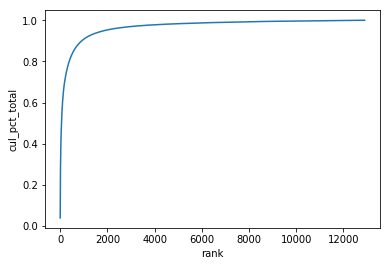

In [32]:
import seaborn as sns

# Cumulative Distribution Plot
sns.lineplot(x='rank', y='cul_pct_total', data=wc)

In [34]:
# Get the max of the 1st 20th
wc[wc['rank'] <= 20]['cul_pct_total'].max()

0.3353465992363599

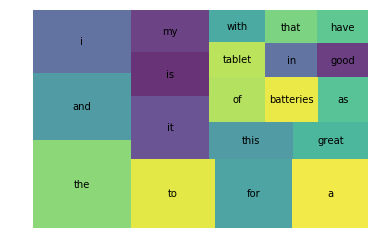

In [33]:
import squarify
import matplotlib.pyplot as plt

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Processing Raw Text with Spacy
Should answer the "why" of Spacy while recreating steps from above using same visualization

Spacy's datamodel for documents is unique among NLP libraries. Instead of storing the documents components repeatively in various datastructures, Spacy indexes components and simply stores the lookup informaiton. 

This is often why Spacy is considered to be more production grade than library like NLTK.

In [0]:
import spacy
from spacy.tokenizer import Tokenizer

nlp = spacy.load("en_core_web_sm")

# Tokenizer
tokenizer = Tokenizer(nlp.vocab)

In [70]:
# Works the same way as split()
[token.text for token in tokenizer(sample)]

['Friends,', 'Romans,', 'countrymen,', 'lend', 'me', 'your', 'ears;']

In [0]:
# Tokenizer Pipe

tokens = []

""" Make them tokens """
# Tokenizer.pipe passes in more than one, like a series.
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
  # Split each review into individual words.
  doc_tokens = [token.text for token in doc]
  tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [38]:
df['tokens'].head()

0    [I, order, 3, of, them, and, one, of, the, ite...
1    [Bulk, is, always, the, less, expensive, way, ...
2    [Well, they, are, not, Duracell, but, for, the...
3    [Seem, to, work, as, well, as, name, brand, ba...
4    [These, batteries, are, very, long, lasting, t...
Name: tokens, dtype: object

In [0]:
wc = count(df['tokens'])

In [40]:
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
7,the,12316,25154,1.0,0.034219,0.034219,0.434703
9,and,13541,21850,2.0,0.029725,0.063944,0.477940
6,I,9913,19762,3.0,0.026884,0.090828,0.349887
14,to,11227,19324,4.0,0.026288,0.117117,0.396266
31,for,11790,17197,5.0,0.023395,0.140512,0.416137


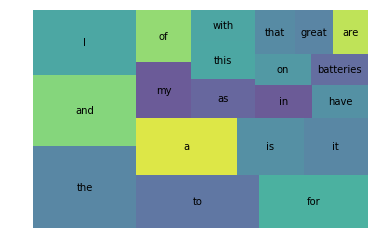

In [41]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

## Stop Words
<a id="p2"></a>

Section Agenda
- What are they?
- How do we get rid of them using Spacy?
- Visualization
- Libraries of Stop Words
- Extending Stop Words
- Statistical trimming

If the visualizations above, you began to notice a pattern. Most of the words don't really add much to our undertanding of product reviews. Words such as "I", "and", "of", etc. have almost no semantic meaning to us. We call these useless words "stop words," because we should 'stop' ourselves from including them in the analysis. 

Most NLP libraries have built in lists of stop words that common english words: conjunctions, articles, adverbs, pronouns, and common verbs. The best practice, however, is to extend/customize these standard english stopwords for your problem's domain. If I am studying political science, I may want to exclude the word "politics" from my analysis; it's so common it does not add to my understanding. 

### Default Stop Words
Let's take a look at the standard stop words that came with our spacy model:

In [42]:
## Spacy's Default Stop Words
type(nlp.Defaults.stop_words)

set

In [0]:
tokens = []

""" Update those tokens """
for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
  doc_tokens = []
  
  for token in doc:
    if (token.is_stop == False) and (token.is_punct == False):
      doc_tokens.append(token.text.lower())
  tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [44]:
df.tokens.head()

0    [order, 3, item, bad, quality., missing, backu...
1               [bulk, expensive, way, products, like]
2                            [duracell, price, happy.]
3              [work, brand, batteries, better, price]
4            [batteries, long, lasting, price, great.]
Name: tokens, dtype: object

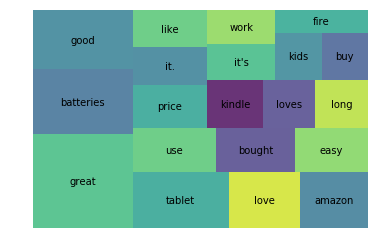

In [45]:
wc = count(df['tokens'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Extending Stop Words


In [46]:
print(type(nlp.Defaults.stop_words))

<class 'set'>


In [0]:
# [this,] comma at the end represents the list as a set
STOP_WORDS = nlp.Defaults.stop_words.union(['I', 'amazon', 'i', 'Amazon', 'it', "it's", 'it.', 'the', 'this',])

In [0]:
tokens = []

for doc in tokenizer.pipe(df['reviews.text'], batch_size=500):
    
    doc_tokens = []
    
    for token in doc: 
        ## Add that new line
        if token.text not in STOP_WORDS:
          doc_tokens.append(token.text.lower())
   
    tokens.append(doc_tokens)
    
df['tokens'] = tokens

In [56]:
wc = count(df['tokens'])
wc.head()

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
80,great,7187,8183,1.0,0.021599,0.021599,0.253671
26,batteries,3964,5671,2.0,0.014969,0.036568,0.139912
72,good,4633,5148,3.0,0.013588,0.050156,0.163525
7995,tablet,3920,4714,4.0,0.012443,0.062598,0.138359
84,the,2970,3653,5.0,0.009642,0.072240,0.104828


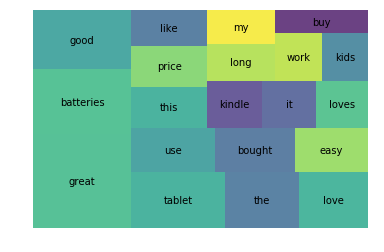

In [57]:
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Statistical Trimming

So far, we have talked about stop word in relation to either broad english words or domain specific stop words. Another common approach to stop word removal is via statistical trimming. The basic idea: preserve the words that give the most about of variation in your data. 

Do you remember this graph?

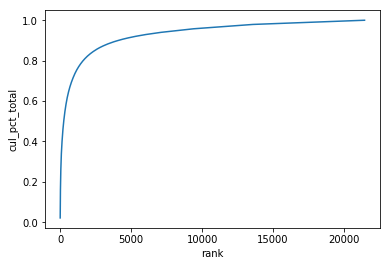

In [58]:
sns.lineplot(x='rank', y='cul_pct_total', data=wc);

This graph tells us that only a *handful* of words represented 80% of words in the overall corpus. We can interpret this in two ways: 
1. The words that appear most frequently may not provide any insight into the mean on the documens since they are so prevalent. 
2. Words that appear infrequeny (at the end of the graph) also probably do not add much value, because the are mentioned so rarely. 

Let's take a look at the words at the bottom and the top and make a decision for ourselves:

In [59]:
wc.head(50)

,word,appears_in,count,rank,pct_total,cul_pct_total,appears_in_pct
80,great,7187,8183,1.0,0.021599,0.021599,0.253671
26,batteries,3964,5671,2.0,0.014969,0.036568,0.139912
72,good,4633,5148,3.0,0.013588,0.050156,0.163525
7995,tablet,3920,4714,4.0,0.012443,0.062598,0.138359
84,the,2970,3653,5.0,0.009642,0.072240,0.104828
117,love,3154,3458,6.0,0.009127,0.081368,0.111323
122,use,2881,3233,7.0,0.008533,0.089901,0.101687
41,bought,2916,3111,8.0,0.008211,0.098113,0.102922
1416,easy,2598,2823,9.0,0.007451,0.105564,0.091698
193,this,2685,2819,10.0,0.007441,0.113005,0.094769


In [60]:
wc['appears_in_pct'].describe()

count    21442.000000
mean         0.000587
std          0.004057
min          0.000035
25%          0.000035
50%          0.000071
75%          0.000176
max          0.253671
Name: appears_in_pct, dtype: float64

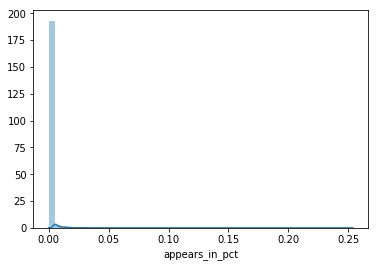

In [61]:
# Frequency of appears in documents
sns.distplot(wc['appears_in_pct']);

## Stemming & Lemmatization
<a id="p3"></a>

You can see from our example above there is still some normalization to do to get a clean analysis. You notice that there many words (*i.e.* 'batteries', 'battery') which share the same root word. We can use either the process of stemming or lemmatization to trim our words down to the 'root' word. 

__Section Agenda__:

- Which is which
- why use one v. other
- show side by side visualizations 
- how to do it in spacy & nltk
- introduce PoS in here as well

### Stemming

> *a process for removing the commoner morphological and inflexional endings from words in English. Its main use is as part of a term normalisation process that is usually done when setting up Information Retrieval systems.* - [Martin Porter](https://tartarus.org/martin/PorterStemmer/)

Some examples include:
- 'ing'
- 'ed'
- 's'

These rules are by no means comprehensive, but they are somewhere to start. Most stemming is done by well documented algorithms such as Porter, Snowball, and Dawson. Porter and its newer version Snowball are the most popular stemming algorithms today. For more information on various stemming algorithms check out [*"A Comparative Study of Stemming Algorithms"*](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf) 


Spacy does not do stemming out of the box, but instead uses a different technique called *lemmatization* which we will discuss in the next section. Let's turn to an antique python package `nltk` for stemming. 


In [62]:
from nltk.stem import PorterStemmer

ps = PorterStemmer()

words = ["game","gaming","gamed","games"]

for word in words:
    print(ps.stem(word))

game
game
game
game


#### Two Minute Challenge

Apply the Porter stemming algorithm to the tokens in the `df` dataframe. Visualize the results in the tree graph we have been using for this session.

In [0]:
# Put in a new column `stems`


In [0]:
wc = count(df['stems'])

wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### Lemmatization

You notice immediately that results are kinda funky - words just oddly chopped off. The Porter algorithm did exactly what it knows to do: chop off endings. Stemming works well in applications where humans don't have to worry about reading the results. Search engines and more broadly information retrival algorithms use stemming. Why? Becuase it's fast. 

Lemmatization on the other hand is more methodical. The goal is to transform a word into's base form called a lemma. Plural nouns with funky spellings get transformed to singular tense. Verbs are all transformed to the transitive. Nice tidy data for a visualization. :) However, this tidy data can come at computational cost. Spacy does a pretty freaking good job of it though. Let's take a look:

In [63]:
sent = "This is the start of our NLP adventure. We started here with Spacy."

doc = nlp(sent)

# Lemma Attributes
for token in doc:
  print(token.lemma_)

this
be
the
start
of
-PRON-
NLP
adventure
.
-PRON-
start
here
with
Spacy
.


In [0]:
# Wrap it all in a function
def get_lemmas(text):
    lemmas = []
    doc = nlp(text)
    for token in doc:
      if ((token.is_stop == False) and (token.is_punct == False)) and (token.pos_ != 'PRON'):
         lemmas.append(token.lemma_)
    return lemmas

In [0]:
df['lemmas'] = df['reviews.text'].apply(get_lemmas)

In [68]:
df['lemmas'].head()

0    [order, 3, item, bad, quality, miss, backup, s...
1                [Bulk, expensive, way, product, like]
2                             [Duracell, price, happy]
3                  [work, brand, battery, well, price]
4                  [battery, long, last, price, great]
Name: lemmas, dtype: object

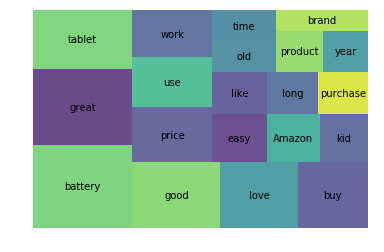

In [69]:
wc = count(df['lemmas'])
wc_top20 = wc[wc['rank'] <= 20]

squarify.plot(sizes=wc_top20['pct_total'], label=wc_top20['word'], alpha=.8 )
plt.axis('off')
plt.show()

### What else should I know? 
- NER
- Dependcy Trees 
- Generators
- the major libraries (NLTK, Spacy, Gensim)